# Регрессия: Полный практический цикл

## 1. Импорт библиотек

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

## 2. Загрузка данных

In [5]:
df = pd.read_csv("datasets/LifeExpectancyData.csv")
print(f"Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов")
df.head()

Размер датасета: 2938 строк, 22 столбцов


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

## 3. Анализ пропусков

In [6]:
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Пропуски': missing,
    'Процент': missing_pct
}).sort_values('Пропуски', ascending=False)

print(missing_df)

                                 Пропуски  Процент
Population                            652    22.19
Hepatitis B                           553    18.82
GDP                                   448    15.25
Total expenditure                     226     7.69
Alcohol                               194     6.60
Income composition of resources       167     5.68
Schooling                             163     5.55
 thinness  1-19 years                  34     1.16
 thinness 5-9 years                    34     1.16
 BMI                                   34     1.16
Diphtheria                             19     0.65
Polio                                  19     0.65
Life expectancy                        10     0.34
Adult Mortality                        10     0.34
infant deaths                           0     0.00
Status                                  0     0.00
Country                                 0     0.00
Year                                    0     0.00
under-five deaths              

## 4. Анализ целевой переменной

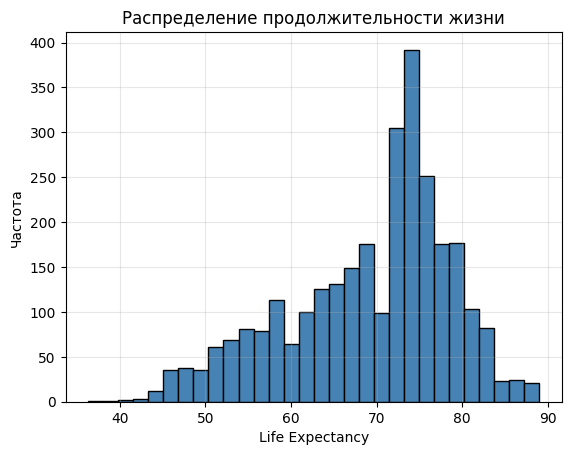

count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: Life expectancy , dtype: float64


In [18]:
plt.hist(df['Life expectancy '], bins=30, color='steelblue', edgecolor='black')
plt.xlabel('Life Expectancy')
plt.ylabel('Частота')
plt.title('Распределение продолжительности жизни')
plt.grid(alpha=0.3)


plt.show()

print(df['Life expectancy '].describe())

## 5. Корреляции с целевой переменной

In [7]:
corr_with_target = df.select_dtypes(include=[np.number]).corr()['Life expectancy '].sort_values(ascending=False)

print("Топ-10 признаков по корреляции:\n")
print(corr_with_target.head(11))

Топ-10 признаков по корреляции:

Life expectancy                    1.000000
Schooling                          0.751975
Income composition of resources    0.724776
 BMI                               0.567694
Diphtheria                         0.479495
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Total expenditure                  0.218086
Name: Life expectancy , dtype: float64


## 6. Обработка данных

### 6.1 Удаление пропусков в целевой переменной

In [8]:
df = df.dropna(subset=['Life expectancy '])
print(f"Датасет после удаления: {df.shape[0]} строк")

Датасет после удаления: 2928 строк


### 6.2 Выбор признаков для модели

In [9]:
selected_features = [
    'Schooling',
    'Income composition of resources',
    'Adult Mortality',
    ' BMI ',
    ' HIV/AIDS',
    'Diphtheria ',
    ' thinness  1-19 years',
    ' thinness 5-9 years',
    'Status'
]

df_model = df[selected_features + ['Life expectancy ']].copy()

### 6.3 Заполнение пропусков медианой

In [10]:
numeric_cols = df_model.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    if df_model[col].isnull().sum() > 0:
        median_val = df_model[col].median()
        df_model[col].fillna(median_val, inplace=True)

C:\Users\kalys\AppData\Local\Temp\ipykernel_29244\1012360326.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_model[col].fillna(median_val, inplace=True)
C:\Users\kalys\AppData\Local\Temp\ipykernel_29244\1012360326.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

### 6.4 One-Hot Encoding для Status

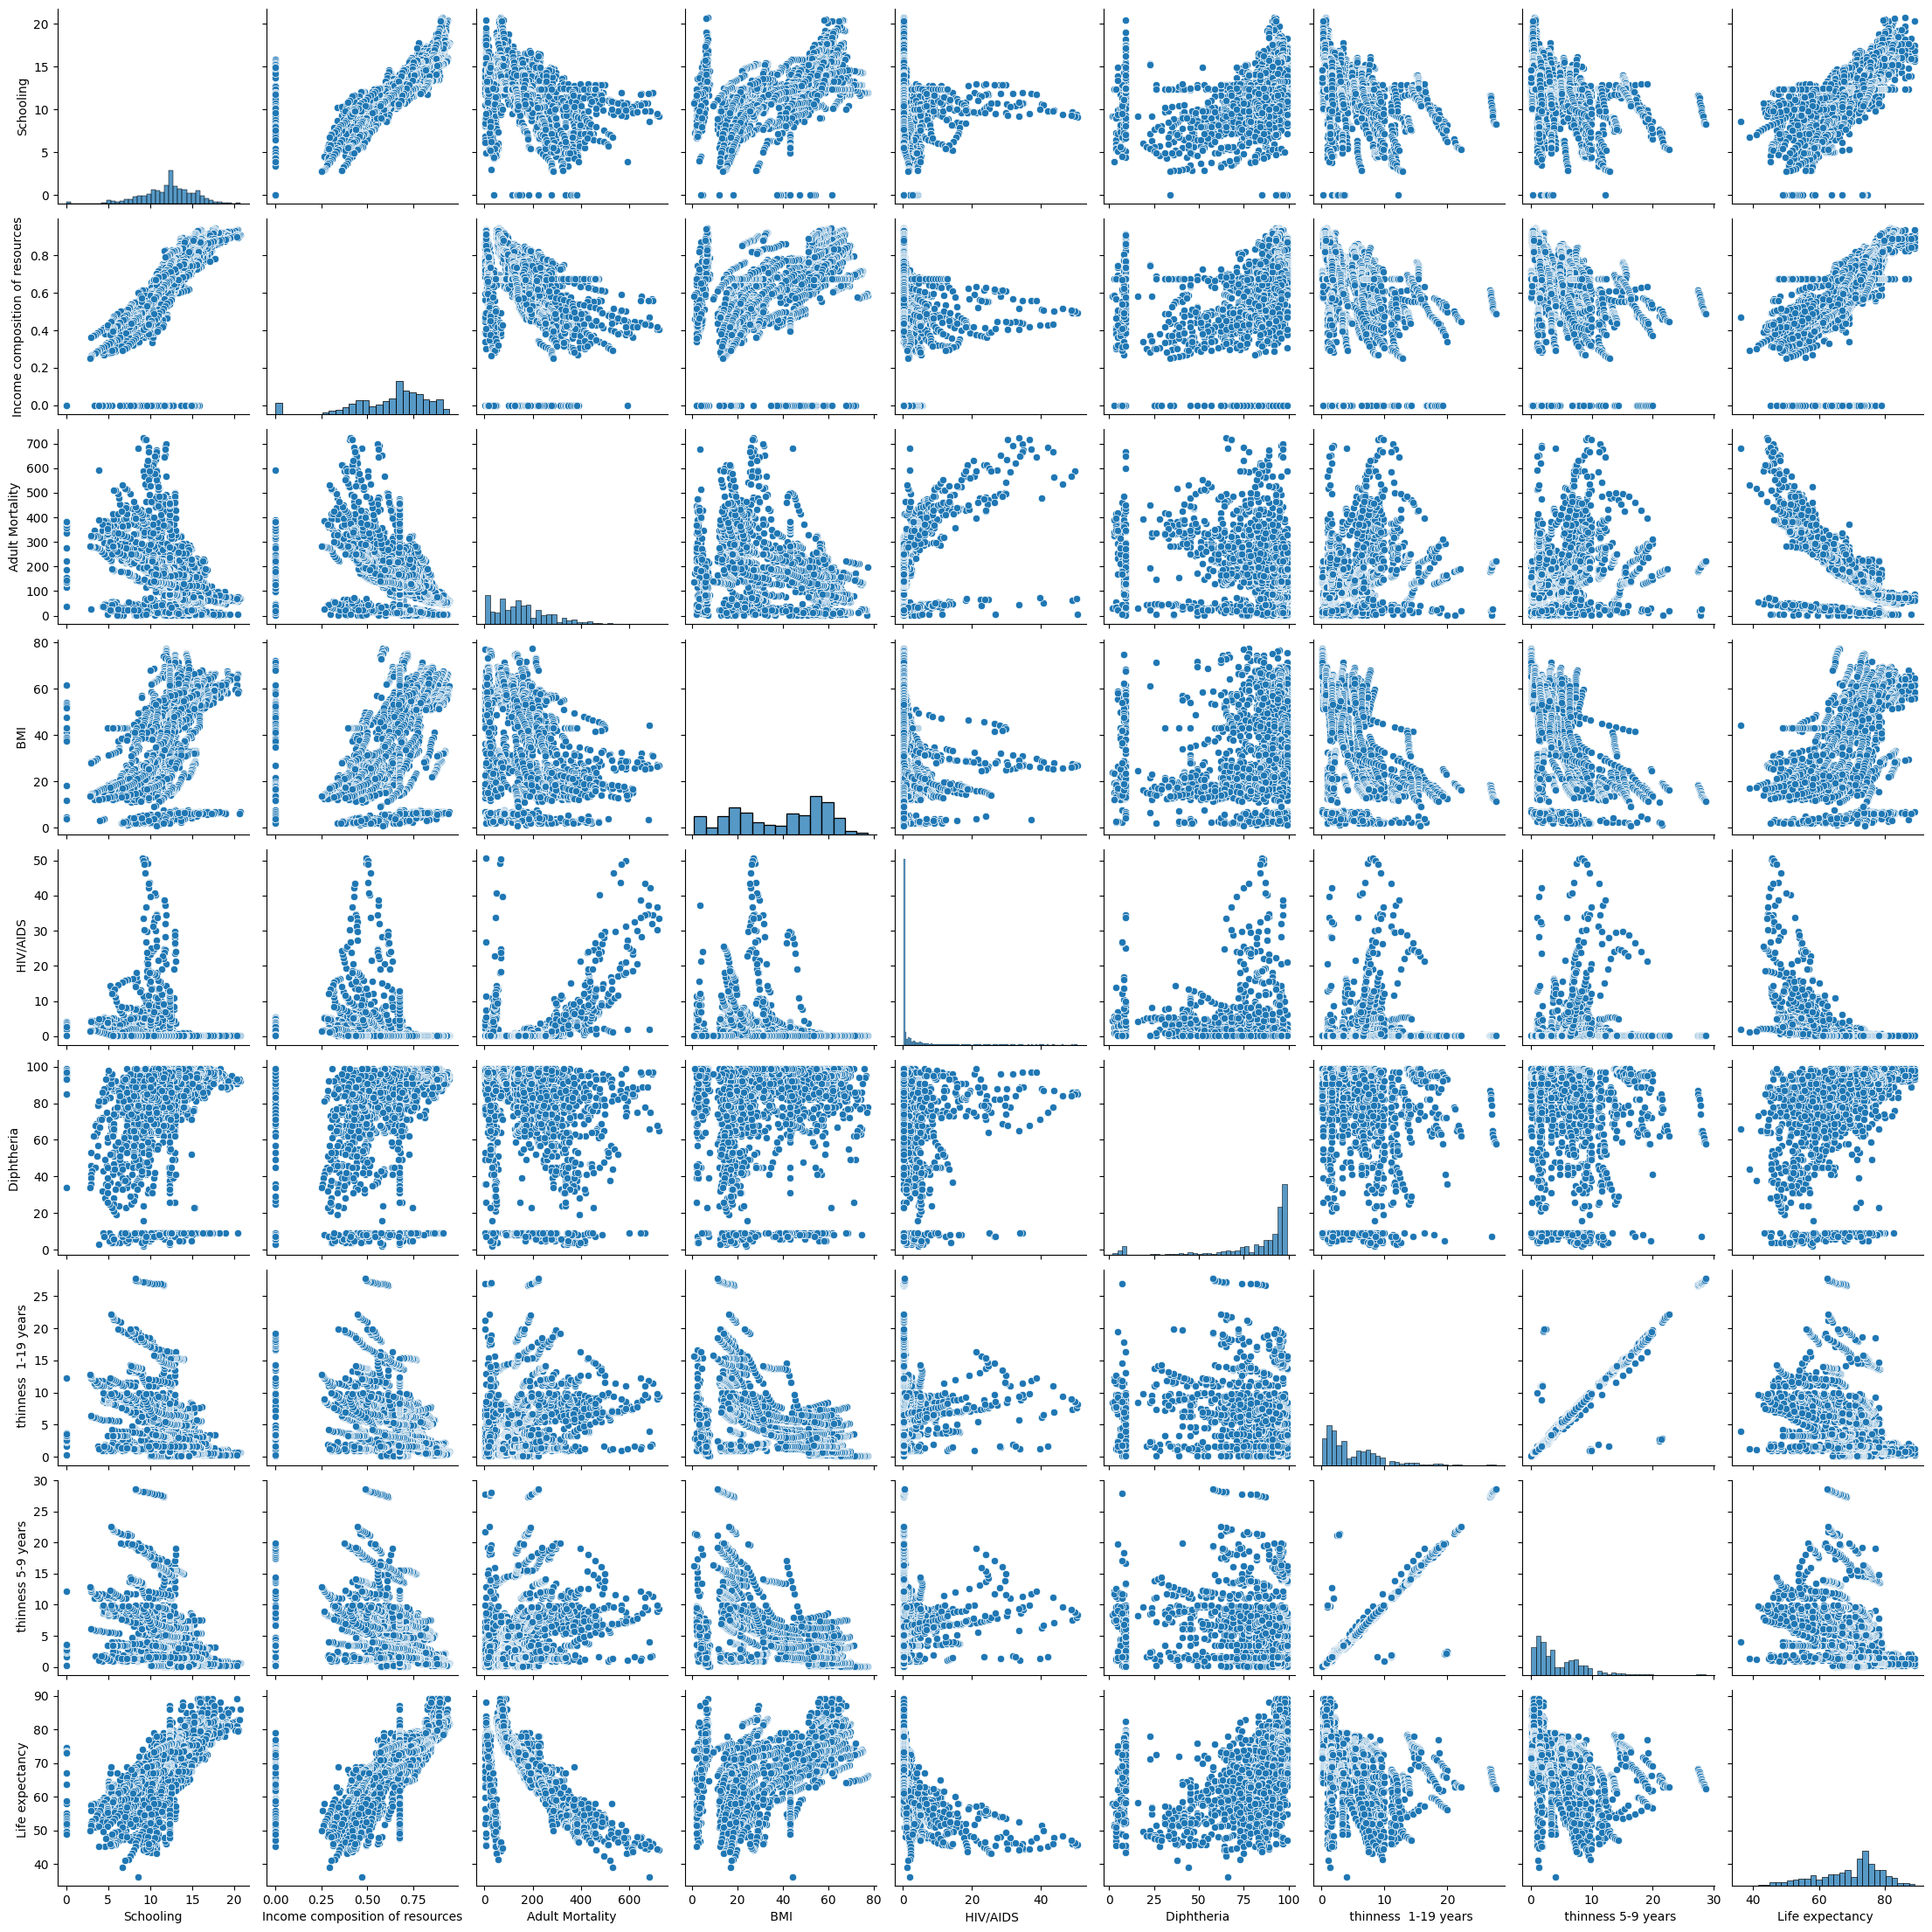

In [12]:
sns.pairplot(df_model)

In [13]:
df_model = pd.get_dummies(df_model, columns=['Status'], dtype=int)
df_model.head()

,Schooling,Income composition of resources,Adult Mortality,BMI,HIV/AIDS,Diphtheria,thinness 1-19 years,thinness 5-9 years,Life expectancy,Status_Developed,Status_Developing
0,10.1,0.479,263.0,19.1,0.1,65.0,17.2,17.3,65.0,0,1
1,10.0,0.476,271.0,18.6,0.1,62.0,17.5,17.5,59.9,0,1
2,9.9,0.470,268.0,18.1,0.1,64.0,17.7,17.7,59.9,0,1
3,9.8,0.463,272.0,17.6,0.1,67.0,17.9,18.0,59.5,0,1
4,9.5,0.454,275.0,17.2,0.1,68.0,18.2,18.2,59.2,0,1


## 7. Подготовка данных для моделей

In [14]:
X = df_model.drop('Life expectancy ', axis=1)
y = df_model['Life expectancy ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=228)

print(f"Train: {X_train.shape[0]} строк")
print(f"Test:  {X_test.shape[0]} строк")
print(f"Признаков: {X_train.shape[1]}")

Train: 2342 строк
Test:  586 строк
Признаков: 10


## 8. MyLinearRegression

In [15]:
class MyLinearRegression:
    """
    Линейная регрессия с градиентным спуском
    """
    
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        """
        Parameters:
        -----------
        learning_rate : float
            Скорость обучения (alpha)
        n_iterations : int
            Количество итераций обучения
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.w0 = None  # intercept
        self.w1 = None  # coefficients
        self.loss_history = []  # история MSE
        
    def fit(self, X, y):
        """
        Обучение модели методом градиентного спуска
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
        y : array-like, shape (n_samples,)
        """        
        n_samples, n_features = X.shape
        self.w0 = 0
        self.w1 = np.zeros(n_features)
        
        # Градиентный спуск
        for i in range(self.n_iterations):
            # Предсказания
            y_pred = self.predict(X)
            
            # Вычисление MSE
            mse = np.mean((y - y_pred) ** 2)
            self.loss_history.append(mse)
            
            # Вычисление градиентов
            dw0 = -2 * np.mean(y - y_pred)
            dw1 = -2 * np.dot(X.T, (y - y_pred)) / n_samples
            
            # Обновление весов
            self.w0 = self.w0 - self.learning_rate * dw0
            self.w1 = self.w1 - self.learning_rate * dw1
            
        return self
    
    def predict(self, X):
        """
        Предсказание значений
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
        
        Returns:
        --------
        y_pred : array, shape (n_samples,)
        """
        return self.w0 + np.dot(X, self.w1)
    
    def get_params(self):
        """Возвращает параметры модели"""
        return {'intercept': self.w0, 'coefficients': self.w1}

## 9. Модель 1: Без масштабирования

In [16]:
model1_my = MyLinearRegression(learning_rate=0.00001, n_iterations=1000)
model1_my.fit(X_train.values, y_train.values)

y_pred1_my = model1_my.predict(X_test.values)

r2_1_my = r2_score(y_test, y_pred1_my)
mae_1_my = mean_absolute_error(y_test, y_pred1_my)
rmse_1_my = np.sqrt(mean_squared_error(y_test, y_pred1_my))

print(f"  R²:   {r2_1_my:.4f}")
print(f"  MAE:  {mae_1_my:.4f}")
print(f"  RMSE: {rmse_1_my:.4f}")

  R²:   -0.6618
  MAE:  7.9643
  RMSE: 11.8186


In [17]:
model1_sk = LinearRegression()
model1_sk.fit(X_train, y_train)
y_pred1_sk = model1_sk.predict(X_test)

r2_1_sk = r2_score(y_test, y_pred1_sk)
mae_1_sk = mean_absolute_error(y_test, y_pred1_sk)
rmse_1_sk = np.sqrt(mean_squared_error(y_test, y_pred1_sk))

print("sklearn LinearRegression (БЕЗ scaling):")
print(f"  R²:   {r2_1_sk:.4f}")
print(f"  MAE:  {mae_1_sk:.4f}")
print(f"  RMSE: {rmse_1_sk:.4f}")

sklearn LinearRegression (БЕЗ scaling):
  R²:   0.7892
  MAE:  3.0394
  RMSE: 4.2092


### Проблема видна в loss history

Начальная ошибка: 4876.17
Финальная ошибка: 150.71


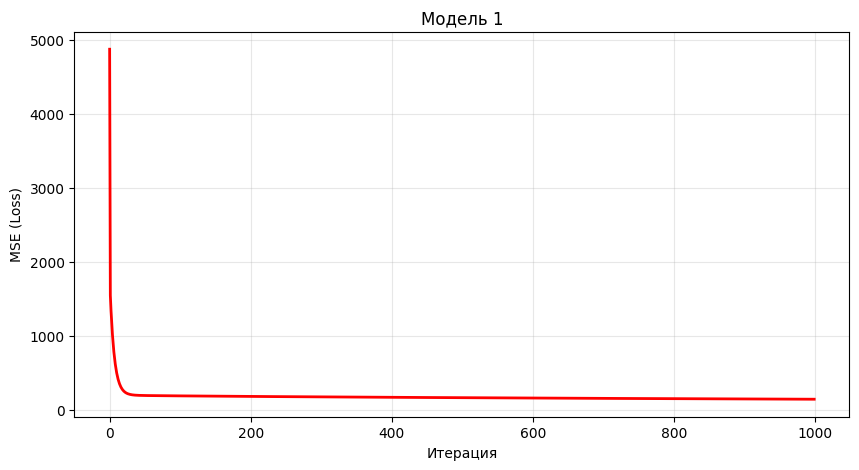

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(model1_my.loss_history, color='red', linewidth=2)
plt.xlabel('Итерация')
plt.ylabel('MSE (Loss)')
plt.title('Модель 1')
plt.grid(alpha=0.3)

print(f"Начальная ошибка: {model1_my.loss_history[0]:.2f}")
print(f"Финальная ошибка: {model1_my.loss_history[-1]:.2f}")

## 10. Модель 2: С масштабированием (StandardScaler)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
model2_my = MyLinearRegression(learning_rate=0.01, n_iterations=1000)
model2_my.fit(X_train_scaled, y_train.values)

y_pred2_my = model2_my.predict(X_test_scaled)

r2_2_my = r2_score(y_test, y_pred2_my)
mae_2_my = mean_absolute_error(y_test, y_pred2_my)
rmse_2_my = np.sqrt(mean_squared_error(y_test, y_pred2_my))

print("MyLinearRegression (С scaling):")
print(f"  R²:   {r2_2_my:.4f}")
print(f"  MAE:  {mae_2_my:.4f}")
print(f"  RMSE: {rmse_2_my:.4f}")

MyLinearRegression (С scaling):
  R²:   0.7892
  MAE:  3.0389
  RMSE: 4.2090


In [21]:
model2_sk = LinearRegression()
model2_sk.fit(X_train_scaled, y_train)
y_pred2_sk = model2_sk.predict(X_test_scaled)

r2_2_sk = r2_score(y_test, y_pred2_sk)
mae_2_sk = mean_absolute_error(y_test, y_pred2_sk)
rmse_2_sk = np.sqrt(mean_squared_error(y_test, y_pred2_sk))

print("sklearn LinearRegression (С scaling):")
print(f"  R²:   {r2_2_sk:.4f}")
print(f"  MAE:  {mae_2_sk:.4f}")
print(f"  RMSE: {rmse_2_sk:.4f}")

sklearn LinearRegression (С scaling):
  R²:   0.7892
  MAE:  3.0394
  RMSE: 4.2092


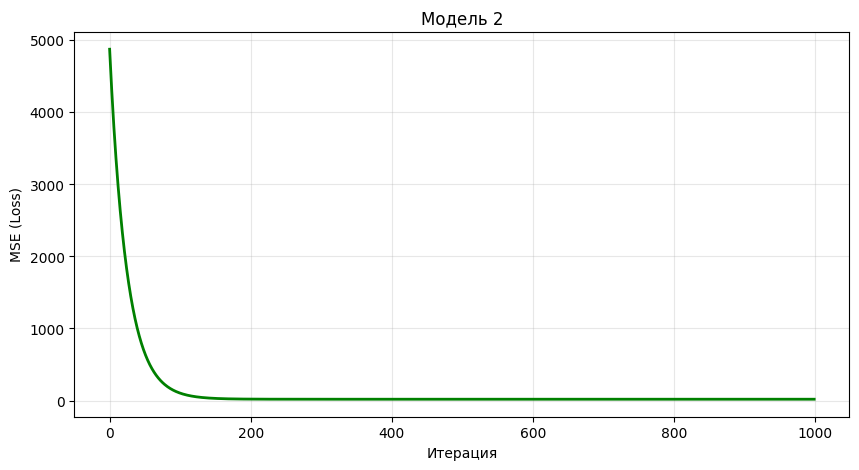

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(model2_my.loss_history, color='green', linewidth=2)
plt.xlabel('Итерация')
plt.ylabel('MSE (Loss)')
plt.title('Модель 2')
plt.grid(alpha=0.3)
plt.show()

## 11. Сравнение learning curves

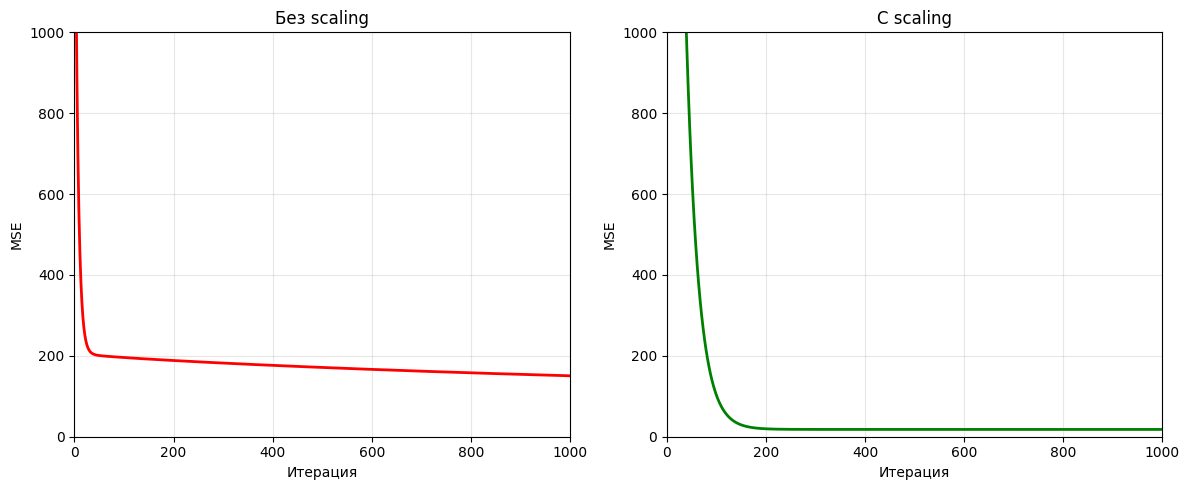

In [23]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(model1_my.loss_history, color='red', linewidth=2)
plt.axis([0, 1000, 0, 1000])
plt.xlabel('Итерация')
plt.ylabel('MSE')
plt.title('Без scaling')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(model2_my.loss_history, color='green', linewidth=2)
plt.axis([0, 1000, 0, 1000])

plt.xlabel('Итерация')
plt.ylabel('MSE')
plt.title('С scaling')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 12. Модель 3: Feature Engineering

In [24]:
X_train_fe = X_train.copy()
X_test_fe = X_test.copy()

X_train_fe['School_Income'] = X_train['Schooling'] * X_train['Income composition of resources']
X_test_fe['School_Income'] = X_test['Schooling'] * X_test['Income composition of resources']

X_train_fe['BMI_Mortality'] = X_train[' BMI '] * X_train['Adult Mortality']
X_test_fe['BMI_Mortality'] = X_test[' BMI '] * X_test['Adult Mortality']

X_train_fe['HIV_Mortality'] = X_train[' HIV/AIDS'] * X_train['Adult Mortality']
X_test_fe['HIV_Mortality'] = X_test[' HIV/AIDS'] * X_test['Adult Mortality']

In [25]:
scaler_fe = StandardScaler()
X_train_fe_scaled = scaler_fe.fit_transform(X_train_fe)
X_test_fe_scaled = scaler_fe.transform(X_test_fe)

In [26]:
model3_my = MyLinearRegression(learning_rate=0.01, n_iterations=1000)
model3_my.fit(X_train_fe_scaled, y_train.values)

y_pred3_my = model3_my.predict(X_test_fe_scaled)

r2_3_my = r2_score(y_test, y_pred3_my)
mae_3_my = mean_absolute_error(y_test, y_pred3_my)
rmse_3_my = np.sqrt(mean_squared_error(y_test, y_pred3_my))

print("MyLinearRegression (Feature Engineering):")
print(f"  R²:   {r2_3_my:.4f}")
print(f"  MAE:  {mae_3_my:.4f}")
print(f"  RMSE: {rmse_3_my:.4f}")

MyLinearRegression (Feature Engineering):
  R²:   0.8107
  MAE:  2.9115
  RMSE: 3.9889


In [27]:
model3_sk = LinearRegression()
model3_sk.fit(X_train_fe_scaled, y_train)
y_pred3_sk = model3_sk.predict(X_test_fe_scaled)

r2_3_sk = r2_score(y_test, y_pred3_sk)
mae_3_sk = mean_absolute_error(y_test, y_pred3_sk)
rmse_3_sk = np.sqrt(mean_squared_error(y_test, y_pred3_sk))

print("sklearn LinearRegression (Feature Engineering):")
print(f"  R²:   {r2_3_sk:.4f}")
print(f"  MAE:  {mae_3_sk:.4f}")
print(f"  RMSE: {rmse_3_sk:.4f}")

sklearn LinearRegression (Feature Engineering):
  R²:   0.8139
  MAE:  2.8925
  RMSE: 3.9552


## 13. Сравнение всех моделей

In [28]:
comparison = pd.DataFrame({
    'Модель': [
        'Без scaling',
        'StandardScaler',
        '+ Feature Engineering'
    ],
    'R²': [r2_1_my, r2_2_my, r2_3_my],
    'MAE': [mae_1_my, mae_2_my, mae_3_my],
})

print(comparison.to_string(index=False))

               Модель        R²      MAE
          Без scaling -0.661802 7.964273
       StandardScaler  0.789234 3.038928
+ Feature Engineering  0.810701 2.911511


## 14. Визуализация: Predicted vs Actual (лучшая модель)

C:\Users\kalys\AppData\Local\Temp\ipykernel_29244\3419997225.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


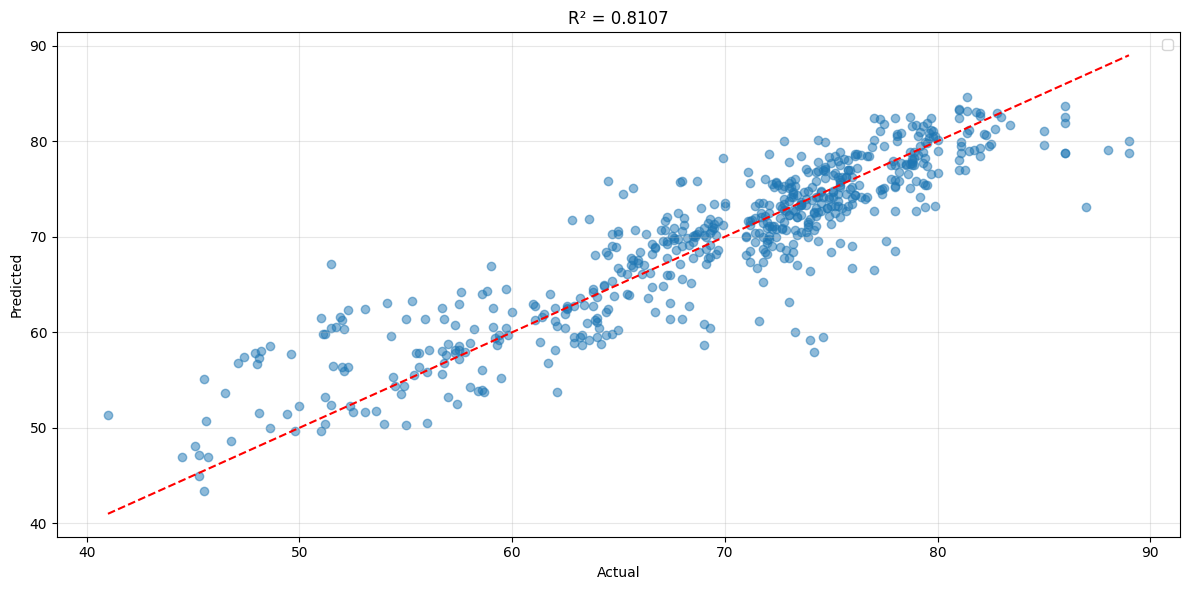

In [29]:
plt.figure(figsize=(12, 6))

plt.scatter(y_test, y_pred3_my, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', )
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'R² = {r2_3_my:.4f}')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


## 15. Анализ важности признаков

In [30]:
feature_importance = pd.DataFrame({
    'Признак': X_train_fe.columns,
    'Коэффициент': model3_sk.coef_
}).sort_values('Коэффициент', key=abs, ascending=False)
print(feature_importance.head(13).to_string(index=False))

                        Признак  Коэффициент
                       HIV/AIDS    -4.455494
                Adult Mortality    -3.934073
                  HIV_Mortality     2.716888
                      Schooling     1.916195
                  School_Income     1.446618
                    Diphtheria      1.232262
                  BMI_Mortality     0.587183
Income composition of resources     0.457433
           thinness  1-19 years    -0.412468
               Status_Developed     0.304439
              Status_Developing    -0.304439
                           BMI      0.281586
             thinness 5-9 years    -0.053960
